# Environment Setup

In [1]:
# Check who is the user running Jupyter.
who_am_i = !whoami

# Define our data base path.
base_path_data = '../input' if who_am_i[0] == 'root' else '../../data'

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(base_path_data))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'test.csv', 'csv_submission.csv', 'train.csv', 'gender_submission.csv']


# Data Set Loading

In [3]:
df = pd.read_csv(base_path_data + '/train.csv', sep=",", header=0, encoding='utf-8')
df.shape

(891, 12)

# Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
print('\nStats')
print(df.describe())


Stats
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
# Check which columns have missing data.
print('\nMissing values')
print(df.isnull().any())


Missing values
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [7]:
print('Column types')
print(df.dtypes)

Column types
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
# Copied from article: https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation
def num_missing(x):
    return sum(x.isnull())

def print_missing_values(df, axis):
    print("Missing values per %s:" % ('column' if axis == 0 else 'row'))
    print(df.apply(num_missing, axis=axis)[:df.shape[1]]) # axis=0 to apply on each column

# Applying per column
print_missing_values(df, 0)

# Applying per row:
print_missing_values(df, 1)

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values per row:
0     1
1     0
2     1
3     0
4     1
5     2
6     0
7     1
8     1
9     1
10    0
11    0
dtype: int64


In [9]:
{'Survived':df.query('Survived == 1').count()[0], 'Did not':df.query('Survived == 0').count()[0]}

{'Survived': 342, 'Did not': 549}

In [10]:
# Check people age under 1.
df.query('Age < 1')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


# Visualization of Data

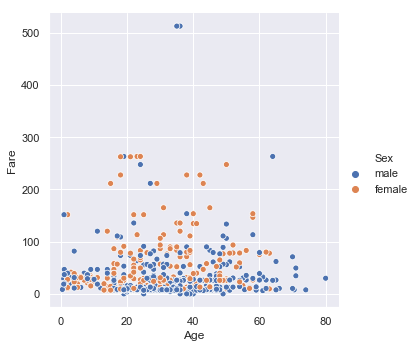

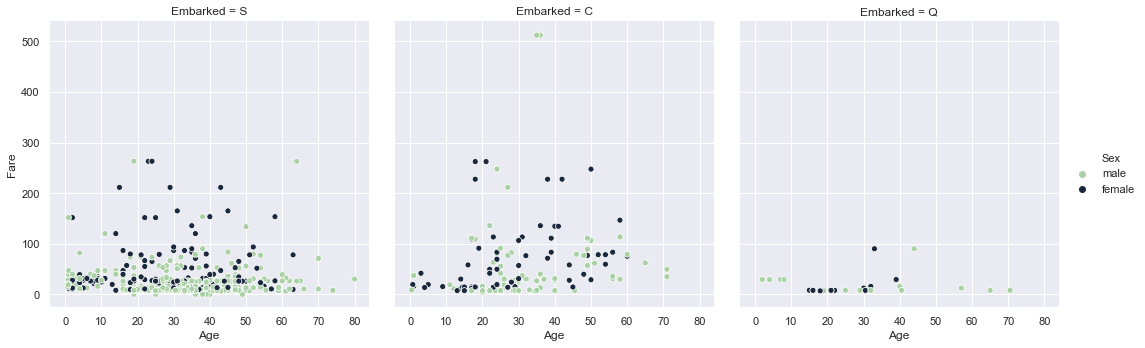

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# Remove outliers.
# df = df[df.Fare < 300]

# http://seaborn.pydata.org/tutorial/relational.html
sns.relplot(x="Age", y="Fare", hue="Sex", data=df) # size="Fare", sizes=(0, 100), 
sns.relplot(x="Age", y="Fare", hue="Sex", col="Embarked", palette="ch:r=-.5,l=.75", data=df) # size="Fare", sizes=(0, 100), 
# plt.title('Fare per age')
plt.show()

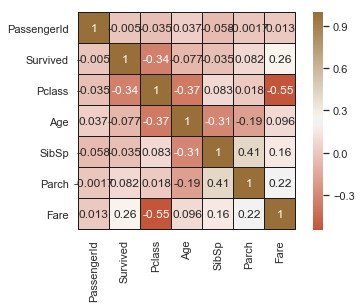

In [12]:
import seaborn as sns
sns.set(style="darkgrid")

# Check the correlation between features.
corr = df.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(20, 50, as_cmap=True), square=True, annot=True, linecolor='k', linewidths=.5)
plt.show()

In [13]:
# Group by age and count to see the distribution.
age_2_count = df.groupby('Age')['PassengerId'].count().reset_index(name="Count")

# Transpose for the sake of visibility.
age_2_count.loc[:15,].transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Count,1.00,1.00,2.00,2.00,1.00,7.0,10.0,6.0,10.0,4.0,3.0,3.0,4.0,8.0,2.0,4.0


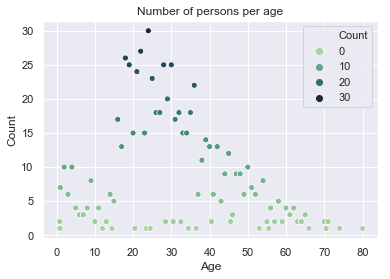

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set the plot.
sns.scatterplot(x="Age", y="Count", hue="Count", palette="ch:r=-.5,l=.75", data=age_2_count) # size="Fare", sizes=(0, 100), 

plt.title('Number of persons per age')
plt.show()

# Data Set Preparation (Pre-processing)

In [15]:
df_tmp = df.copy(deep=True)

## Feature Engineering

In [16]:
import re

def extract_title(name):
#     print(name)
    m = re.search(".*,((\s*\w)+\.).*", name)
    if not m:
        print(name)
    return m.groups(0)[0].strip()

# print(extract_title('Pain, Dr. Alfred').strip())

# Find passenger with Dr title
# print(df[df['Name'].str.contains('Dr')])

# Title needs to be engineered using values from the test set or use it differently.
# For now, leave it out.
# df_tmp['Title'] = df_tmp['Name'].apply(extract_title)

df_tmp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


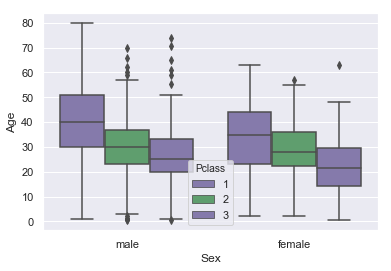

In [17]:
sns.boxplot(x="Sex", y="Age", hue='Pclass', palette=["m", "g"], data=df_tmp)
plt.show()

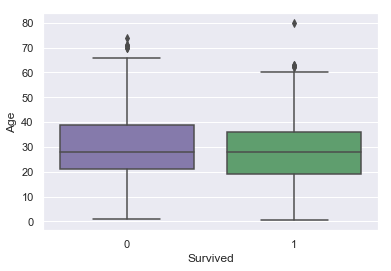

In [18]:
sns.boxplot(x="Survived", y="Age", palette=["m", "g"], data=df_tmp)
plt.show()

## Imputation of Missing Values

In [19]:
print_missing_values(df_tmp, 0)

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
# One method to show entries with NA values for Embarked column.
# nans = lambda df: df[df.isnull().any(axis=1)]
# nans(df_raw.loc[:, ['Embarked']])

# Another method to show entries, not working
# print(df_raw[df_raw['Embarked'].apply(np.isnan)])

# Preferred method to show entries where Embarked is null, NaN, etc.
print(df_tmp.query('Age != Age or Age == Age').loc[:, ['Name', 'Parch', 'SibSp', 'Age']].iloc[:15,])
print('\n' + str(df_tmp.isnull().any()))

# Show the most frequent value in the features.
df_tmp['Age'].mode().values[0]

                                                 Name  Parch  SibSp   Age
0                             Braund, Mr. Owen Harris      0      1  22.0
1   Cumings, Mrs. John Bradley (Florence Briggs Th...      0      1  38.0
2                              Heikkinen, Miss. Laina      0      0  26.0
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)      0      1  35.0
4                            Allen, Mr. William Henry      0      0  35.0
5                                    Moran, Mr. James      0      0   NaN
6                             McCarthy, Mr. Timothy J      0      0  54.0
7                      Palsson, Master. Gosta Leonard      1      3   2.0
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      2      0  27.0
9                 Nasser, Mrs. Nicholas (Adele Achem)      0      1  14.0
10                    Sandstrom, Miss. Marguerite Rut      1      1   4.0
11                           Bonnell, Miss. Elizabeth      0      0  58.0
12                     Saundercock, Mr

24.0

In [21]:
from sklearn.impute import SimpleImputer
class DataPreparator:
    def impute(self, df, df_for_fitting=None, strategy='mean', column=None):
        """
        Impute the data frame using a strategy on a column.

        Parameters
        ----------
        df: DataFrame: the data frame to transform with the fitted value.
        df_for_fit: None or the data frame to fit the Imputer. If None then df is used for fitting.
        strategy: a string for the strategy name defined from sklearn.preprocessing.Imputer.
        column: a string for the name of the column to apply the imputation.

        Returns
        -------
        DataFrame: the 'df' with a new column called 'column'_imputed instead of the 'column'.

        """
        # Define the imputer working on columns. 
        imp = SimpleImputer(missing_values=np.nan, strategy=strategy)

        # Get the dataframe used to fit the imputer.
        df_fit = df_for_fitting if df_for_fitting is None else df

        # Column extractor
        extract_column_df = lambda df: np.array([df[column]]).transpose()

        # Fit the imputer with a DF of shape (*, 1).
        df_ = extract_column_df(df_fit)
        model = imp.fit(df_)

        # Transform the df of shape (*, 1).
        df_ = extract_column_df(df)
        res = pd.DataFrame(model.transform(df_))
        res.columns = [column]

        # Make a copy to add the new column and remove the old one.
        df_tmp = df.drop(column, axis=1)
        new_column = column + '_imputed'
        df_tmp[new_column] = np.array(res[column])

        return df_tmp

data_prep = DataPreparator()

In [22]:
# Proceed to impute the Age column.
# X_aug = X_train2 # pd.concat([X, X_train.loc[:, 'Age']], axis=1)
# print(X_aug['Age'])

# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# cc = 'Age'
# aaa = np.array([X_train2[cc]]).transpose()
# print(aaa.shape)
# model_imp2 = imp.fit(aaa)
# model_imp2.transform(np.array([X_test[cc]]).transpose())

# print(X_train.query('Age != Age').loc[:, ['PassengerId','Age']].iloc[:10, :])
df_tmp = data_prep.impute(df_tmp, df_tmp, column='Age')
df_tmp = data_prep.impute(df_tmp, df_tmp, column='Cabin', strategy='most_frequent')
df_tmp = data_prep.impute(df_tmp, df_tmp, column='Embarked', strategy='most_frequent')

print(df.shape, df_tmp.shape)

print_missing_values(df_tmp, 0)

(891, 12) (891, 12)
Missing values per column:
PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Age_imputed         0
Cabin_imputed       0
Embarked_imputed    0
dtype: int64


## Features Selection

In [23]:
# First keep the columns of interest.

def select_features(df, features_to_keep=['Pclass', 'Sex', 'Fare', 'Age_imputed']):
    return df.loc[:, features_to_keep]

# Add the function as a class method to the DataPreparator.
#     features_to_keep = list(set(df.columns) - set(['PassengerId', 'Survived', 'Name', 'SibSp', 'Ticket', 'Cabin_imputed']))

DataPreparator.select_features = lambda self, df, features_to_keep=['Pclass', 'Sex', 'Fare', 'Age_imputed']: select_features(df, features_to_keep)

In [24]:
df_tmp = data_prep.select_features(df_tmp)

# Check the data.
print_missing_values(df_tmp, 0)
print(df_tmp.dtypes)

Missing values per column:
Pclass         0
Sex            0
Fare           0
Age_imputed    0
dtype: int64
Pclass           int64
Sex             object
Fare           float64
Age_imputed    float64
dtype: object


## One-hot Encoding of Categorical Features

In [25]:
def get_one_hot(df, features=None):
    """
    Does the one-hot vectorization of features.
    """
    X = df.loc[:, features]

    # Use one-hot encoding for categorical data.
    X_dummies = pd.get_dummies(X, columns=features, dtype=np.uint8)
    X = df.drop(features, axis=1)
    return pd.concat([X, X_dummies], axis=1)

# Add the one-hot method to the DataPreparator class.
DataPreparator.get_one_hot = lambda self, df, features=[]: get_one_hot(df, features)    
    
# Prepare the data sets.
X_final = data_prep.get_one_hot(df_tmp, features=['Sex', 'Pclass'])
Y_final = df.loc[:, 'Survived'] # Get the label from the original data frame df.

# Check data.
print(X_final.shape, Y_final.shape)
X_final.iloc[:5,], df_tmp.iloc[:5,]

(891, 7) (891,)


(      Fare  Age_imputed  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3
 0   7.2500         22.0           0         1         0         0         1
 1  71.2833         38.0           1         0         1         0         0
 2   7.9250         26.0           1         0         0         0         1
 3  53.1000         35.0           1         0         1         0         0
 4   8.0500         35.0           0         1         0         0         1,
    Pclass     Sex     Fare  Age_imputed
 0       3    male   7.2500         22.0
 1       1  female  71.2833         38.0
 2       3  female   7.9250         26.0
 3       1  female  53.1000         35.0
 4       3    male   8.0500         35.0)

In [26]:
# Check the data.
print_missing_values(X_final, 0)
print(X_final.dtypes)

Missing values per column:
Fare           0
Age_imputed    0
Sex_female     0
Sex_male       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64
Fare           float64
Age_imputed    float64
Sex_female       uint8
Sex_male         uint8
Pclass_1         uint8
Pclass_2         uint8
Pclass_3         uint8
dtype: object


## Scaling the Dataframe

In [27]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X_final))
X_scaled.columns = X_final.columns
X_scaled.iloc[:2,]

/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Fare,Age_imputed,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,-0.502445,-0.592481,-0.737695,0.737695,-0.565685,-0.510152,0.902587
1,0.786845,0.638789,1.355574,-1.355574,1.767767,-0.510152,-1.107926


In [28]:
type(X_final)

pandas.core.frame.DataFrame

# Split Dataset into Training and Validation datasets

In [29]:
from sklearn.model_selection import train_test_split

# Divide into training and cross-validation datasets.
X_train, X_validation, Y_train, Y_validation = train_test_split(X_scaled, Y_final, test_size=0.2, random_state=42)
# X_train, X_validation, Y_train, Y_validation = X_final, X_final, Y_final, Y_final

# Check the data.
print(X_train.shape, Y_train.shape)
print(X_validation.shape, Y_validation.shape)

(712, 7) (712,)
(179, 7) (179,)


# 5-fold Cross Validation on 4 Different Classifiers

In [30]:
from sklearn.base import clone

class HelperCrossValidation:
    """
    Helper class for running cross validations.
    """
    def print_features_importance(self, df, clf):
        if not hasattr(clf, 'feature_importances_'):
            return
        
        print(type(df))
        print(type(clf))
        
        # Display the features by descending importance.
        df_disp = pd.DataFrame(list(zip(list(df.columns), clf.feature_importances_)))
        df_disp.columns = ['Feature', 'Percentage']
        print(df_disp.sort_values(by='Percentage', ascending=False)[:10].to_string(index=False))

    def cross_val_score_do(self, name, clf, X, Y, cv):
        # Cross validate the classifier.
        scores = cross_val_score(clf, X, Y, cv=cv)
        print("\n%s Score: %.10f" % (name, scores.mean()))

        # Fit the classifier and show the feature importance.
        clf_cloned = clone(clf)
        model = clf_cloned.fit(X, Y)

        # Display the features by descending importance.
        self.print_features_importance(X, clf_cloned)

        return model

# Setting Training Dataset and Classifiers

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Setup.
X = X_train
Y = Y_train

# Instanciate a HelperCrossValidation
helper_cv = HelperCrossValidation()

# Model.
clf_lr = LogisticRegression(penalty='l2', C=0.1)
model_lr = helper_cv.cross_val_score_do('RandomForestClassifier', clf_lr, X, Y, 5)

clf_rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=101)
model_rfc = helper_cv.cross_val_score_do('RandomForestClassifier', clf_rfc, X, Y, 5)

clf_etc = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=290)
model_etc = helper_cv.cross_val_score_do('ExtraTreesClassifier', clf_etc, X, Y, 5)

clf_dtc = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=13)
model_dtc = helper_cv.cross_val_score_do('DecisionTreeClassifier', clf_dtc, X, Y, 5)

clf_gbc = GradientBoostingClassifier(n_estimators=70, learning_rate=0.5, max_depth=1, random_state=43)
model_gbc = helper_cv.cross_val_score_do('GradientBoostingClassifier', clf_gbc, X, Y, 5)

# SGDClassifier(max_iter=5)

/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs


RandomForestClassifier Score: 0.7921762984

RandomForestClassifier Score: 0.7991387795
<class 'pandas.core.frame.DataFrame'>
<class 'sklearn.ensemble.forest.RandomForestClassifier'>
Feature  Percentage
       Fare    0.309559
Age_imputed    0.274660
   Sex_male    0.152965
 Sex_female    0.139012
   Pclass_3    0.055079
   Pclass_1    0.053339
   Pclass_2    0.015386

ExtraTreesClassifier Score: 0.8061417755
<class 'pandas.core.frame.DataFrame'>
<class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
Feature  Percentage
       Fare    0.308728
Age_imputed    0.276013
 Sex_female    0.221796
   Sex_male    0.085316
   Pclass_3    0.064921
   Pclass_1    0.021797
   Pclass_2    0.021429

DecisionTreeClassifier Score: 0.7725158270
<class 'pandas.core.frame.DataFrame'>
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
Feature  Percentage
 Sex_female    0.310167
       Fare    0.307127
Age_imputed    0.243507
   Pclass_3    0.099645
   Pclass_1    0.023758
   Pclass_2    0.015795
   Sex_ma

# ROC Visualization

lr Accuracy :0.787921348314607


/Users/hujol/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


dtc Accuracy :0.978932584269663
etc Accuracy :0.978932584269663
gbc Accuracy :0.827247191011236


/Users/hujol/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/hujol/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/hujol/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depreca

rfc Accuracy :0.953651685393258


/Users/hujol/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


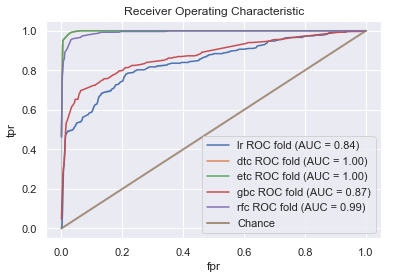

In [32]:
from sklearn import metrics

def plot_roc(models={}, X=None, Y=None):
    for name in models:
        model = models[name]
        
        # Evaluate.
        y_pred_proba = model.predict_proba(X)[::, 1] # Dont know why take index=1 or 0?!?!
        print("%s Accuracy :%.15f" % (name, metrics.accuracy_score(Y, model.predict(X))))

        # Compute the probabilities.
        fpr, tpr, _ = metrics.roc_curve(Y, y_pred_proba, pos_label=1)
        roc_auc = metrics.auc(fpr, tpr)

        # Plot the ROC.
        fpr_tpr = pd.DataFrame(list(zip(fpr.ravel(), tpr.ravel())))
        fpr_tpr.columns = [ 'fpr', 'tpr']
        sns.lineplot(x="fpr", y="tpr", data=fpr_tpr, label='%s ROC fold (AUC = %0.2f)' % (name, roc_auc))

    sns.lineplot([0, 1], [0, 1], linestyle='--', lw=2, label='Chance', alpha=.8)
    plt.legend(loc=4)
    plt.title('Receiver Operating Characteristic')
    plt.show()
    
plot_roc({'lr' : model_lr, 'dtc' : model_dtc, 'etc' : model_etc, 'gbc' : model_gbc, 'rfc' : model_rfc}, X, Y)

# 5-fold Cross Validation on Best Classifier for Hyperparameters Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

def do_cross_validation(clf, X, Y, k):
    """
    Run the k-fold GridSearchCV on X and Y
    
    Parameters
    ----------
    clf: the original classifier to clone for testing the hyperparameters.
    X: the data set to use for splitting into training and cross validation datasets.
    Y: the labels.
    k; the number of cross validation datasets split from X.
    
    Returns
    -------
    clf: the best classifier after evaluating all the possible hyperparameter settings.
    
    """
    parameters = {'max_features': [1, len(X.columns)], 'n_estimators': [5, 50, 250, 400, 1000]}

    clf_cv = GridSearchCV(clf, parameters, cv=k)

    %timeit
    clf_model = clf_cv.fit(X, Y)

    # Display the scores.
#     for row in clf_model.cv_results_:
#         print(row)

    return clf_model.best_estimator_

clf = do_cross_validation(clf_etc, X, Y, 5)

# Evaluation of the Best Classifier

In [34]:
from sklearn.metrics import confusion_matrix

# Print features importance.
helper_cv.print_features_importance(X, clf)

<class 'pandas.core.frame.DataFrame'>
<class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
Feature  Percentage
       Fare    0.310063
Age_imputed    0.255802
   Sex_male    0.163768
 Sex_female    0.146399
   Pclass_3    0.096489
   Pclass_1    0.019686
   Pclass_2    0.007793


In [35]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def display_metrics(clf, X, Y):
    # Predict the values on X.    
    X_prediction = clf.predict(X)

    print("Score: %.15f" % clf.score(X, Y))

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(Y, X_prediction)
    # tn, fp, fn, tp = cnf_matrix.ravel()

    # Compute confusion matrix
    np.set_printoptions(precision=2)

    class_names = ['Did Not', 'Survived']

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

Score: 0.978932584269663
Confusion matrix, without normalization
[[442   2]
 [ 13 255]]
Normalized confusion matrix
[[1.   0.  ]
 [0.05 0.95]]


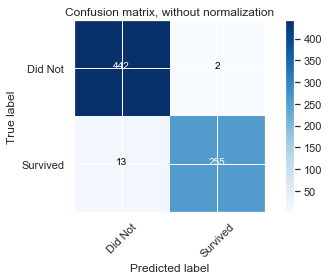

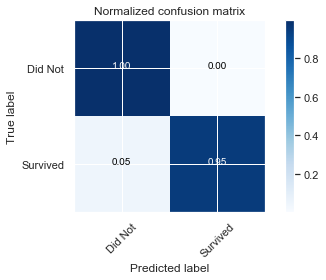

In [36]:
display_metrics(clf, X, Y)

# Test on X_test Dataset

In [37]:
# Create the test sets.
Xt = X_validation
Yt = Y_validation

print(Xt.shape, Yt.shape)
print(Xt.columns)

print_missing_values(Xt, 0)

(179, 7) (179,)
Index(['Fare', 'Age_imputed', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')
Missing values per column:
Fare           0
Age_imputed    0
Sex_female     0
Sex_male       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64


Score: 0.776536312849162
<class 'pandas.core.frame.DataFrame'>
<class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
Feature  Percentage
       Fare    0.310063
Age_imputed    0.255802
   Sex_male    0.163768
 Sex_female    0.146399
   Pclass_3    0.096489
   Pclass_1    0.019686
   Pclass_2    0.007793
Score: 0.776536312849162
Confusion matrix, without normalization
[[84 21]
 [19 55]]
Normalized confusion matrix
[[0.8  0.2 ]
 [0.26 0.74]]


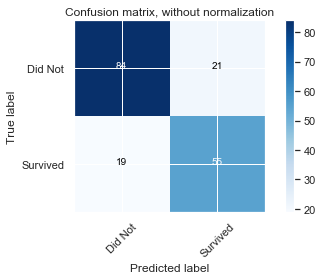

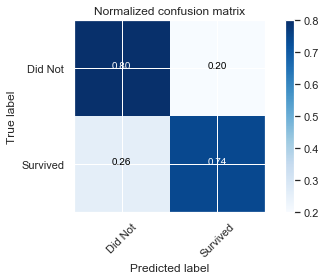

In [38]:
# Score the Classifier that performed best on the test set.
print("Score: %.15f" % clf.score(Xt, Yt))

# Print features importance.
helper_cv.print_features_importance(Xt, clf)

# Display metrics.
display_metrics(clf, Xt, Yt)

# CSV of Test Data Set Prediction

In [39]:
# Load the test set.
df_test_raw = pd.read_csv(base_path_data + '/test.csv', sep=",", header=0, encoding='utf-8')

print(df_test_raw.isna().any())
print(df_test_raw.dtypes)

# Show the result.
print_missing_values(df_test_raw, 0)

# print(df_test_raw.iloc[:10,])
df_test_raw.query('Fare != Fare')

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Missing values per column:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [40]:
from sklearn.preprocessing import Imputer

df_tmp = df_test_raw
# Leave this out for the time being.
# df_tmp['Title'] = df_test_raw['Name'].apply(extract_title)

df_tmp.head()

df_tmp = data_prep.impute(df_tmp, df_tmp, column='Age')
df_tmp = data_prep.impute(df_tmp, df_tmp, column='Cabin', strategy='most_frequent')
df_tmp = data_prep.impute(df_tmp, df_tmp, column='Fare', strategy='mean')
df_tmp['Fare'] = df_tmp['Fare_imputed']

# Check the columns of the trained model based on features of X.
print(X.columns)
print(df_tmp.columns)

df_tmp = data_prep.select_features(df_tmp, features_to_keep=['Fare', 'Age_imputed', 'Sex', 'Pclass'])

# TODO: jh 2018/11/02
# Should check that the columns of the test dataset are the same as the X dataset used for training.

print(df_tmp.columns)

Xt_raw = data_prep.get_one_hot(df_tmp, features=['Sex', 'Pclass']) # 'Cabin_imputed', 

# Add scaling.
Xt_scaled = pd.DataFrame(ss.transform(Xt_raw))
Xt_scaled.columns = Xt_raw.columns

Xt_raw = Xt_scaled
print(df_test_raw.shape, Xt_raw.shape)

Index(['Fare', 'Age_imputed', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Embarked', 'Age_imputed', 'Cabin_imputed', 'Fare_imputed', 'Fare'],
      dtype='object')
Index(['Fare', 'Age_imputed', 'Sex', 'Pclass'], dtype='object')
(418, 11) (418, 7)


/Users/hujol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


In [41]:
# Show the result.
print_missing_values(Xt, 0)
print_missing_values(Xt_raw, 0)

Missing values per column:
Fare           0
Age_imputed    0
Sex_female     0
Sex_male       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64
Missing values per column:
Fare           0
Age_imputed    0
Sex_female     0
Sex_male       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64


In [42]:
X_test_given_predicted = clf.predict(Xt_raw)

# print(X_test.iloc[:10,])

In [43]:
import datetime

df_to_submit = pd.DataFrame(list(zip(df_test_raw.loc[:,'PassengerId'], X_test_given_predicted)))
df_to_submit.columns = ['PassengerId', 'Survived']
df_to_submit.PassengerId = df_to_submit.PassengerId.astype(np.int32)
df_to_submit.Survived = df_to_submit.Survived.astype(np.int32)

today = datetime.datetime.today()
today_s = today.strftime('%Y%m%d-%H%M')

csv_dest = "%s/csv_submission_%s.csv" % (base_path_data, today_s)

# Save the CSV
df_to_submit.to_csv(csv_dest, index=False)

print("test prediction save in:\n %s" % csv_dest)

test prediction save in:
 ../../data/csv_submission_20181105-1127.csv
